# CLUSTERING THE MILITARY POWERS OF COUNTRIES

<img src='https://storage.googleapis.com/kaggle-datasets-images/1667046/2734500/7db21bcda4723e0fbee08b1a124c7c87/dataset-cover.jpg?t=2021-10-23-20-42-00'>
<a href='https://www.kaggle.com/datasets/sleymanzeynul/military-strengths-of-countries-2021' target=_blank>Data linki</a>

* Bu projenin amacı, ülkelerin askeri güçlerini belirli özellikleri temel alarak kümelemek ve bu ülkeleri gruplandırmaktır. Clustering algoritmaları kullanılarak, benzer askeri özelliklere sahip ülkeler tespit edilecek ve ortaya çıkan kümelerin özellikleri analiz edilecektir. Bu sayede, dünya genelindeki askeri güç dağılımı ve ülkelerin göreceli konumları daha iyi anlaşılabilecektir. 

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# EDA

In [2]:
df=pd.read_excel('World military power.xlsx')

In [3]:
df.head()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38,Albania,0,Albania,0,Albania,0,Albania,0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201,Algeria,0,Algeria,6,Algeria,0,Algeria,5,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57,Angola,0,Angola,0,Angola,0,Angola,0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,A

In [4]:
df.shape

(139, 60)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   2020 ranking       139 non-null    object
 1   Unnamed: 1         139 non-null    object
 2   Airforce Strength  139 non-null    object
 3   Unnamed: 3         139 non-null    object
 4   Unnamed: 4         139 non-null    object
 5   Unnamed: 5         139 non-null    object
 6   Unnamed: 6         139 non-null    object
 7   Unnamed: 7         139 non-null    object
 8   Unnamed: 8         139 non-null    object
 9   Unnamed: 9         139 non-null    object
 10  Unnamed: 10        139 non-null    object
 11  Unnamed: 11        139 non-null    object
 12  Unnamed: 12        139 non-null    object
 13  Unnamed: 13        139 non-null    object
 14  Unnamed: 14        139 non-null    object
 15  Unnamed: 15        139 non-null    object
 16  Land Strength      139 non-null    object
 1

In [6]:
df.isnull().sum()

2020 ranking          0
Unnamed: 1            0
Airforce Strength     0
Unnamed: 3            0
Unnamed: 4            0
Unnamed: 5            0
Unnamed: 6            0
Unnamed: 7            0
Unnamed: 8            0
Unnamed: 9            0
Unnamed: 10           0
Unnamed: 11           0
Unnamed: 12           0
Unnamed: 13           0
Unnamed: 14           0
Unnamed: 15           0
Land Strength         0
Unnamed: 17           0
Unnamed: 18           0
Unnamed: 19           0
Unnamed: 20           0
Unnamed: 21           0
Unnamed: 22           0
Unnamed: 23           0
Unnamed: 24           0
Unnamed: 25           0
Navy Strength        14
Unnamed: 27          14
Unnamed: 28          23
Unnamed: 29          23
Unnamed: 30          23
Unnamed: 31          23
Unnamed: 32          23
Unnamed: 33          23
Unnamed: 34          23
Unnamed: 35          23
Finances              0
Unnamed: 37           0
Unnamed: 38           0
Unnamed: 39           0
Logistics             0
Unnamed: 41     

In [7]:
df.columns=df.loc[0]
df.drop([0], axis=0, inplace=True)  
# unnamed yazan ilk satırı silip alttaki satırı başlık yapamak gerekiyor 
#bilal ışık

In [8]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38,Albania,0,Albania,0,Albania,0,Albania,0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201,Algeria,0,Algeria,6,Algeria,0,Algeria,5,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57,Angola,0,Angola,0,Angola,0,Angola,0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369
5,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49,Argentina,0,Argentina,2,Argentina,4,Argentina,0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Military Strength                        138 non-null    object
 1   Military Strength Power Index            138 non-null    object
 2   Aircraft Strength                        138 non-null    object
 3   Aircraft Strength value                  138 non-null    object
 4   Fighter/Interceptor Strength             138 non-null    object
 5   Fighter/Interceptor Strength value       138 non-null    object
 6   Attack Aircraft Strength                 138 non-null    object
 7   Attack Aircraft Strength value           138 non-null    object
 8   Transport Aircraft Fleet Strength        138 non-null    object
 9   Transport Aircraft Fleet Strength value  138 non-null    object
 10  Trainer Aircraft Fleet                   138 non-null    objec

In [10]:
df.isnull().sum()

0
Military Strength                           0
Military Strength Power Index               0
Aircraft Strength                           0
Aircraft Strength value                     0
Fighter/Interceptor Strength                0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength                    0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength           0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet                      0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength                   0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength            0
Attack Helicopter Fleet Strength value      0
Tank Strength                               0
Tank Strength value                         0
AFV/APC Strength                            0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength           0
Self-Propelled Artillery Strengt

In [11]:
# Total Border Coverage deki Boş değerlerin hangi ülkeler/bölgeler için olduğunu bulma
countries_with_null_values = df.loc[df['Total Border Coverage'].isnull(), 'Military Strength']
print("Boş 'Total Border Coverage' değerleri olan ülkeler:") 
print(countries_with_null_values.tolist())

Boş 'Total Border Coverage' değerleri olan ülkeler:
['Australia', 'Bahrain', 'Japan', 'Madagascar', 'New Zealand', 'Philippines', 'Singapore', 'Sri Lanka', 'Taiwan']


* Bu ülkeler ada ülke olduğu için sınırları yok dolayısıyla boş değerler var ,bu ülkeleri haritada göstermek istedim.

In [12]:
#pip install folium

In [13]:
import folium
import pandas as pd

# Ülke listesi
countries = ['Australia', 'Bahrain', 'Japan', 'Madagascar', 'New Zealand', 'Philippines', 'Singapore', 'Sri Lanka', 'Taiwan']

# Ülkelerin koordinatlarını içeren bir DataFrame oluşturun
country_coords = pd.DataFrame({
    'country': countries,
    'latitude': [-25.274398, 26.0667, 36.204824, -18.766947, -40.900557, 12.879721, 1.290270, 7.873054, 23.69781],
    'longitude': [133.775136, 50.5333, 138.252924, 46.869107, 174.886746, 121.774017, 103.851959, 80.771797, 120.96051]
})

# Haritayı oluşturma
m = folium.Map(location=[0, 0], zoom_start=2)

# Ülke noktalarını haritaya ekleme
for idx, row in country_coords.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['country']
    ).add_to(m)

# Haritayı görüntüleme
m

In [14]:
countries_with_null_values = df.loc[df['Navy Fleet Strengths'].isnull(), 'Military Strength']
print("Boş 'Navy Fleet Strengths")
print(countries_with_null_values.tolist()) # donanama filosu

Boş 'Navy Fleet Strengths
['Botswana', 'Burkina Faso', 'Central African Republic', 'Chad', 'Czechia', 'Ethiopia', 'Hungary', 'Kyrgyzstan', 'Mali', 'Moldova', 'Mongolia', 'Nepal', 'Niger', 'North Macedonia']


In [15]:
df.sample(7)

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
78,Morocco,0.8408,Morocco,214,Morocco,46,Morocco,0,Morocco,31,Morocco,67,Morocco,64,Morocco,0,Morocco,1443,Morocco,2901,Morocco,505,Morocco,200,Morocco,144,Morocco,121,Morocco,0,Morocco,0,Morocco,0,Morocco,3,Morocco,"10,00,00,00,000",Morocco,"51,48,00,00,000",Morocco,55,Morocco,160,Morocco,"2,06,000",Morocco,"6,84,000",Morocco,"1,71,57,065",Morocco,"3,43,14,130",Morocco,"4,46,550",Morocco,1835,Morocco,0,Morocco,2363
118,Switzerland,0.5259,Switzerland,169,Switzerland,54,Switzerland,0,Switzerland,18,Switzerland,54,Switzerland,42,Switzerland,0,Switzerland,326,Switzerland,1338,Switzerland,224,Switzerland,0,Switzerland,0,Switzerland,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,"5,00,00,00,000",Switzerland,"16,64,00,00,00,000",Switzerland,63,Switzerland,0,Switzerland,"2,60,000",Switzerland,0,Switzerland,"36,32,250",Switzerland,"82,92,809",Switzerland,41277,NaN,NaN,Switzerland,1299,Switzerland,1770
28,Colombia,0.6045,Colombia,469,Colombia,21,Colombia,38,Colombia,76,Colombia,80,Colombia,224,Colombia,0,Colombia,0,Colombia,595,Colombia,6,Colombia,110,Colombia,0,Colombia,453,Colombia,0,Colombia,11,Colombia,0,Colombia,4,Colombia,"10,60,00,00,000",Colombia,"1,24,60,00,00,000",Colombia,836,Colombia,"8,53,600",Colombia,"3,00,000",Colombia,"2,00,20,00,000",Colombia,"2,40,84,498",Colombia,"4,81,68,996",Colombia,"11,38,910",Colombia,3208,Colombia,24725,Colombia,6672
98,Portugal,0.8612,Portugal,90,Portugal,24,Portugal,0,Portugal,11,Portugal,18,Portugal,23,Portugal,0,Portugal,133,Portugal,756,Portugal,18,Portugal,61,Portugal,0,Portugal,41,Portugal,0,Portugal,2,Portugal,0,Portugal,5,Portugal,"3,35,80,00,000",Portugal,"4,49,00,00,00,000",Portugal,64,Portugal,0,Portugal,"2,65,000",Portugal,0,Portugal,"48,04,949",Portugal,"1,03,55,493",Portugal,92090,Portugal,1793,Portugal,210,Portugal,1224
13,Belgium,1.0499,Belgium,148,Belgium,43,Belgium,0,Belgium,12,Belgium,64,Belgium,29,Belgium,0,Belgium,0,Belgium,984,Belgium,0,Belgium,0,Belgium,0,Belgium,17,Belgium,0,Belgium,0,Belgium,0,Belgium,2,Belgium,"4,92,10,00,000",Belgium,"12,81,00,00,00,000",Belgium,41,Belgium,0,Belgium,"6,45,000",Belgium,0,Belgium,"48,33,107",Belgium,"1,15,70,762",Belgium,30528,Belgium,67,Belgium,2043,Belgium,1297
32,Democratic Republic of the Congo,1.1389,Democratic Republic of the Congo,53,Democratic Republic of the Congo,2,Democratic Republic of the Congo,4,Democratic Republic of the Congo,13,Democratic Republic of the Congo,0,Democratic Republic of the Congo,34,

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Military Strength                        138 non-null    object
 1   Military Strength Power Index            138 non-null    object
 2   Aircraft Strength                        138 non-null    object
 3   Aircraft Strength value                  138 non-null    object
 4   Fighter/Interceptor Strength             138 non-null    object
 5   Fighter/Interceptor Strength value       138 non-null    object
 6   Attack Aircraft Strength                 138 non-null    object
 7   Attack Aircraft Strength value           138 non-null    object
 8   Transport Aircraft Fleet Strength        138 non-null    object
 9   Transport Aircraft Fleet Strength value  138 non-null    object
 10  Trainer Aircraft Fleet                   138 non-null    objec

In [17]:
df = df.fillna(0)

In [18]:
df.isnull().sum()

0
Military Strength                          0
Military Strength Power Index              0
Aircraft Strength                          0
Aircraft Strength value                    0
Fighter/Interceptor Strength               0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength                   0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength          0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet                     0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength                  0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength           0
Attack Helicopter Fleet Strength value     0
Tank Strength                              0
Tank Strength value                        0
AFV/APC Strength                           0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength          0
Self-Propelled Artillery Strength value    0
Towed Ar

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

* df de value olan sutunlar int idi,onları alıp ilk iki sutunuda ekleyip güncel bir df oluşturdum 30 sutunluk, tekrar eden veride silinmiş oldu.

In [20]:
# 'Military Strength' ve 'Military Strength Power Index' sütunlarını hariç tutmak için sütun isimlerini liste olarak alın
exclude_columns = ['Military Strength', 'Military Strength Power Index']

# 'value' kelimesi içeren sütunları seçin
columns_to_keep = [col for col in df.columns if 'value' in col or col in exclude_columns]

# Seçilen sütunları dataframe'e atayın
df = df[columns_to_keep]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

In [22]:
df.sample(6)

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
94,Paraguay,2.1898,33,0,0,6,15,11,0,13,63,0,108,0,40,0,0,0,0,"25,00,00,000","17,70,00,00,000",799,0,30000,0,"33,72,366","70,25,763","4,06,752",0,3100,4655
26,Chile,0.7668,282,44,0,30,93,92,0,300,1430,48,158,10,69,0,4,0,10,"4,25,00,00,000","1,83,40,00,00,000",481,3244,"3,25,000","15,00,00,000","86,57,902","1,79,25,262","7,56,102",6435,12290,7801
36,Egypt,0.1872,1054,215,88,59,387,294,81,4295,11700,1139,2189,1084,316,2,8,0,7,"11,20,00,00,000","77,47,00,00,000",83,"5,89,400","8,32,000","4,40,00,00,000","4,29,46,553","9,94,13,317","10,01,450",2450,3500,2612
103,Saudi Arabia,0.3034,879,270,81,49,208,283,34,1062,12825,705,1818,122,55,0,0,0,3,"67,60,00,00,000","2,05,10,00,00,000",214,"1,01,30,000","40,00,000","2,66,50,00,00,000","1,77,03,745","3,30,91,113","21,49,690",2640,0,4272
41,France,0.1702,1229,269,0,121,187,589,62,528,6028,109,12,13,180,4,9,11,11,"41,50,00,00,000","53,60,00,00,00,000",464,15170,"16,00,000","7,23,50,000","3,01,11,868","6,73,64,357","6,43,801",4853,8501,4072
25,Chad,1.6383,35,0,6,6,4,17,3,60,372,10,51,10,0,0,0,0,0,"20,00,00,000","1,72,40,00,000",59,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",0,0,6406


In [23]:
df['defense spending budget value'] = df['defense spending budget value'].str.replace(',', '').astype(float)
df['External Debt value'] = df['External Debt value'].str.replace(',', '').astype(float)
df['Oil Production value'] = df['Oil Production value'].str.replace(',', '').astype(float)
df['Oil Consumption value'] = df['Oil Consumption value'].str.replace(',', '').astype(float)
df['Proven Oil Reserves value'] = df['Proven Oil Reserves value'].str.replace(',', '').astype(float)
df['Available Manpower value'] = df['Available Manpower value'].str.replace(',', '').astype(float)
df['Total Population value'] = df['Total Population value'].str.replace(',', '').astype(float)
df['Total Square Land Area value'] = df['Total Square Land Area value'].str.replace(',', '').astype(float)
df['Total Coastline Coverage value'] = df['Total Coastline Coverage value'].str.replace(',', '').astype(float)
df['Total Waterway Coverage value'] = df['Total Waterway Coverage value'].str.replace(',', '').astype(float)

In [24]:
df.sample(6)

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
30,Cuba,1.2208,80,38,0,2,26,14,4,1180,670,100,150,100,12,0,0,0,2,5.000000e+08,3.006000e+10,133,NaN,152000.0,1.240000e+08,5980621.0,1.111640e+07,110860.0,NaN,NaN,29
115,Sudan,1.3017,190,46,38,22,11,73,43,690,400,10,0,0,18,0,0,0,0,2.470000e+09,5.605000e+10,74,102300.0,NaN,5.000000e+09,24061430.0,4.312084e+07,1861484.0,NaN,NaN,6819
67,Liberia,5.5737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.300000e+07,1.036000e+09,29,NaN,NaN,NaN,2226923.0,4.809768e+06,111369.0,NaN,NaN,1667
27,China,0.0691,3210,1232,371,224,314,911,281,3500,33000,3800,3600,2650,777,2,74,36,52,2.370000e+11,1.598000e+12,507,3838000.0,13500000.0,2.562000e+10,752855402.0,1.384689e+09,9596961.0,NaN,110000.0,22457
108,Slovenia,1.9496,38,0,0,3,23,16,0,44,269,0,63,0,2,0,0,0,0,5.810000e+08,4.630000e+10,16,NaN,NaN,NaN,1002714.0,2.102126e+06,NaN,NaN,NaN,1211
49,Hungary,0.8215,47,12,0,5,6,24,8,30,944,0,300,0,0,0,0,0,0,2.080000e+09,1.381000e+11,41,NaN,145000.0,2.510000e+07,4618081.0,9.825704e+06,103000.0,NaN,NaN,2106


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

In [26]:
df.isnull().sum()

0
Military Strength                            0
Military Strength Power Index                0
Aircraft Strength value                      0
Fighter/Interceptor Strength value           0
Attack Aircraft Strength value               0
Transport Aircraft Fleet Strength value      0
Trainer Aircraft Fleet value                 0
Helicopter Fleet Strength value              0
Attack Helicopter Fleet Strength value       0
Tank Strength value                          0
AFV/APC Strength value                       0
Self-Propelled Artillery Strength value      0
Towed Artillery Strength value               0
Rocket Projector Strength value              0
Navy Fleet Strengths value                   0
Aircraft Carrier Fleet Strength value        0
Submarine Fleet Strength value               0
Destroyer Fleet Strength value               0
Frigate Fleet Strength value                 0
defense spending budget value                0
External Debt value                          0
Airport Tot

In [27]:
# Boş değerleri olan sütunları bir liste olarak belirle
columns_to_fill = ['Oil Production value', 
                  'Oil Consumption value',
                  'Proven Oil Reserves value',
                  'Total Square Land Area value',
                  'Total Coastline Coverage value',
                  'Total Waterway Coverage value']

# Her bir sütun için boş değerleri 0 ile doldurun
for col in columns_to_fill:
    df[col] = df[col].fillna(0)

In [38]:
df.to_pickle('military_power.pkl')

# Modelling

In [28]:
x=df.drop('Military Strength',axis=1)

In [29]:
model=KMeans(4)

In [30]:
model=model.fit(x)

In [31]:
tahmin=model.predict(x)

In [32]:
x['cluster']=tahmin
#x diye yeni b isutun açıp grupladıklarımızı oraya atıyoruz

In [45]:
x

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
1,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,1.200000e+10,2.840000e+09,43,0.0,0.0,0.000000e+00,14325743.0,3.494084e+07,652230.0,0.0,0.0,5987,1
2,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,2.500000e+08,9.505000e+09,4,0.0,0.0,1.683000e+08,1519438.0,3.057220e+06,0.0,0.0,0.0,691,1
3,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,1.300000e+10,6.260000e+09,157,1306000.0,325000.0,1.220000e+10,20741263.0,4.165749e+07,2381741.0,0.0,0.0,6734,1
4,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,7.000000e+09,4.208000e+10,176,1666000.0,0.0,8.273000e+09,6244205.0,3.035588e+07,1246700.0,0.0,0.0,5369,1
5,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,4.200000e+09,2.149000e+11,1138,479400.0,685000.0,2.185000e+09,20179430.0,4.469420e+07,2780400.0,0.0,0.0,11968,1
6,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0,0,0,0,0,1.385000e+09,1.041000e+10,11,0.0,0.0,0.000000e+00,1696085.0,3.038217e+06,0.0,0.0,0.0,1570,1
7,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48,2,6,2,8,2.630000e+10,1.714000e+12,480,263000.0,1005000.0,1.821000e+09,10808002.0,2.347014e+07,7741220.0,0.0,0.0,0,0
8,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0,0,0,0,0,3.380000e+09,6.308000e+11,52,0.0,215000.0,4.300000e+07,4017691.0,8.793370e+06,0.0,0.0,0.0,2524,1
9,0.9463,147,17,12,1,29,88,17,570,1451,187,227,162,31,0,4,0,1,2.805000e+09,1.741000e+10,37,789300.0,180000.0,7.000000e+09,5042346.0,1.004652e+07,0.0,0.0,0.0,2468,1
10,1.8547,109,17,0,2,37,65,22,180,843,33,26,17,39,0,0,0,1,1.415000e+09,5.215000e+10,4,0.0,0.0,1.246000e+08,806505.0,1.422659e+06,0.0,0.0,0.0,0,1


In [33]:
silhouette_score(x,tahmin)

0.8713120561165879

In [39]:
#grupların birbirine uzaklığını hesaplar, 2 den 9 a kadar olan her k değeri için silhouete score gösterir
wcss=[]
ss=[]
for i in range(2,10): #en az iki olmak zorunda o yüzden 1
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.9493996936226043
0.8995442950360221
0.8713120561165879
0.867519554074208
0.7746953343529153
0.7817947546409018
0.7782624057667364
0.7809562458822847


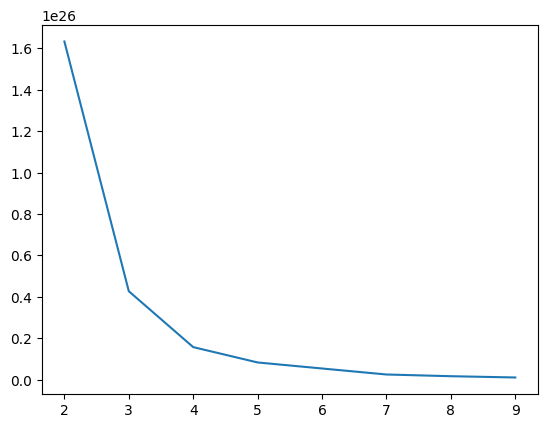

In [37]:
plt.plot(range(2,10),wcss)

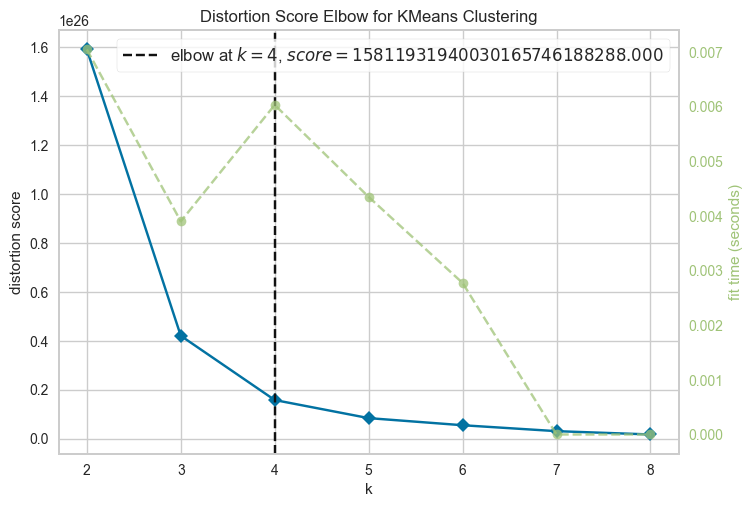

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
#optimum küme sayısını görselleştirelim
km=KMeans()
vis=KElbowVisualizer(km,k=(2,9))
vis.fit(x)
vis.show()

* silhouette score da data x ekseninden y eksenine döndüğü anda optimum grup o sayıdır, yani 4 görünüyor burada

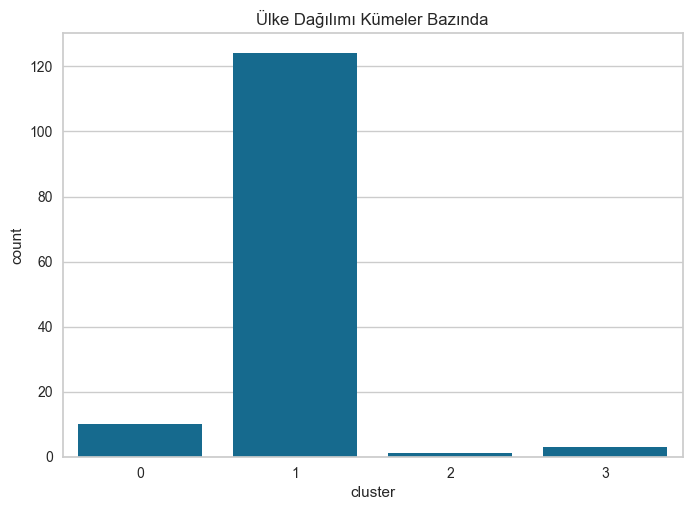

In [61]:
# Ülke Dağılımı Kümeler Bazında
ax = sns.countplot(data=x, x='cluster')
ax.set_title('Ülke Dağılımı Kümeler Bazında')
plt.show()

In [64]:
# Ülkelerin küme atamaları
cluster_labels = model.labels_
df['Cluster'] = cluster_labels

# Her kümedeki ülkeleri listele
for i in range(4):
    print(f"Cluster {i+1}:")
    print(df[df['Cluster'] == i]['Military Strength'].tolist())
    print()

Cluster 1:
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Croatia', 'Cuba', 'Czechia', 'Democratic Republic of the Congo', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'Gabon', 'Georgia', 'Ghana', 'Guatemala', 'Honduras', 'Hungary', 'Iran', 'Iraq', 'Israel', 'Ivory Coast', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Liberia', 'Libya', 'Lithuania', 'Madagascar', 'Malaysia', 'Mali', 'Mauritania', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Korea', 'North Macedonia', 'Oman', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Qatar', 'Republic 

In [65]:
# Ülkelerin küme atamaları
cluster_labels = model.labels_
df['Cluster'] = cluster_labels

# Her kümedeki ülke sayılarını yazdır
for i in range(4):
    cluster_size = len(df[df['Cluster'] == i])
    print(f"Cluster {i+1} ülke sayısı: {cluster_size}")

Cluster 1 ülke sayısı: 110
Cluster 2 ülke sayısı: 1
Cluster 3 ülke sayısı: 1
Cluster 4 ülke sayısı: 3


* Sonuç olarak benzer askeri özelliklere sahip ülkeler 4 e ayrılmaış oldu, fakat US ve UK  tekbaşına birer grup oldular,110 ülke bir grup oldu. Kümelerin özellikleri de ayrıntılı olarak incelenebilir.